<a href="https://colab.research.google.com/github/Dedo488/Website/blob/master/Figueroa_Diego_Miniproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
exec(open('spark_colab_installer.py').read())

Saving spark_colab_installer.py to spark_colab_installer.py
Active services:
1171 DataNode
1524 JobHistoryServer
1016 ResourceManager
1593 Jps
1465 NodeManager
1098 NameNode

Apache Spark installed


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 5834924 bytes


In [ ]:
#!pip -q install numpy nltk

import findspark
findspark.init()
import csv
import json
import os
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

df_bank = spark.read.load('file:///content/bank-additional-full.csv',
                     format="csv", sep=";", inferSchema="true", header="true")

df_bank.show(5)
print(df_bank.count())

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

In [ ]:
df_bank.createOrReplaceTempView('bank')
simpleDF_yes = spark.sql("select age, job,education,housing from bank where y = 'yes'")
simpleDF_nocon = spark.sql("select age, job,education,housing from bank where y = 'no'")
simpleDF_yes.show(10)
simpleDF_nocon.show(10)

+---+------------+-------------------+-------+
|age|         job|          education|housing|
+---+------------+-------------------+-------+
| 41| blue-collar|           basic.4y|    yes|
| 49|entrepreneur|  university.degree|    yes|
| 49|  technician|           basic.9y|     no|
| 41|  technician|professional.course|    yes|
| 45| blue-collar|           basic.9y|    yes|
| 42| blue-collar|           basic.9y|    yes|
| 39|   housemaid|           basic.9y|    yes|
| 28|     unknown|            unknown|    yes|
| 44|    services|        high.school|    yes|
| 42|  technician|professional.course|     no|
+---+------------+-------------------+-------+
only showing top 10 rows

+---+-----------+-------------------+-------+
|age|        job|          education|housing|
+---+-----------+-------------------+-------+
| 56|  housemaid|           basic.4y|     no|
| 57|   services|        high.school|     no|
| 37|   services|        high.school|    yes|
| 40|     admin.|           basic.6y|   

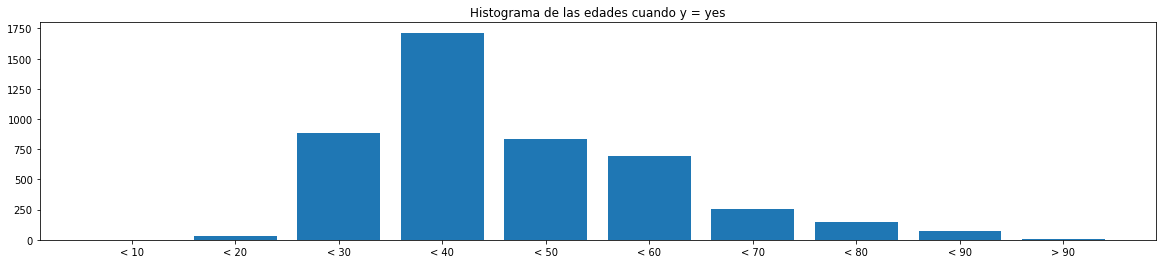

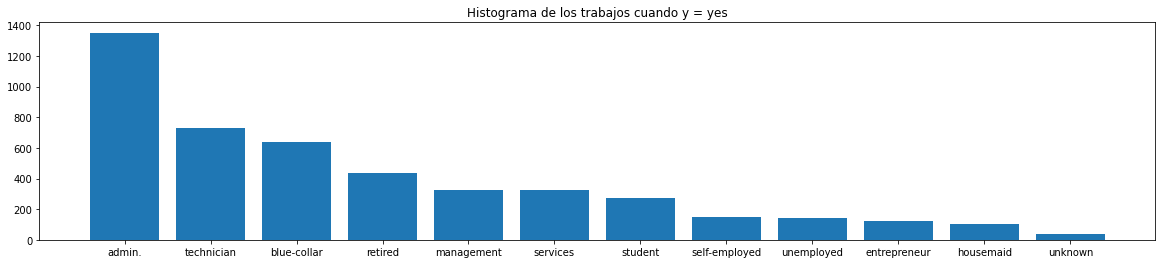

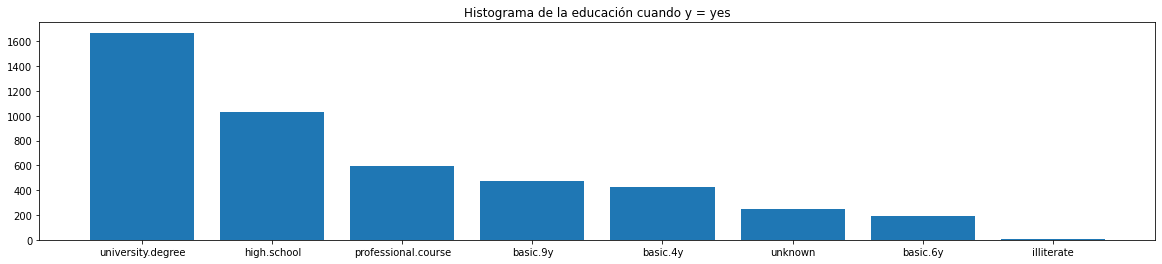

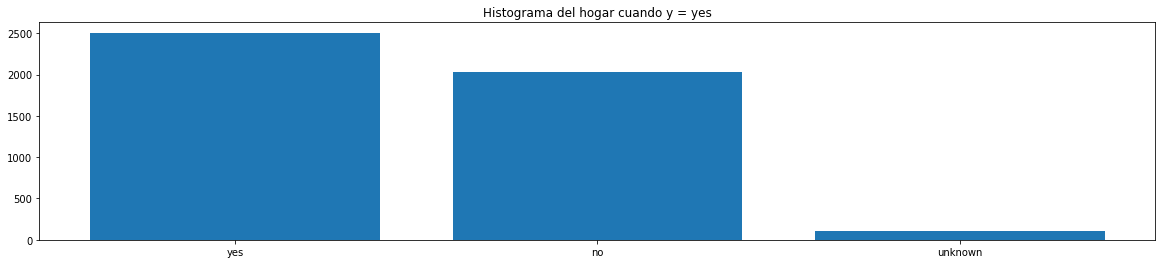

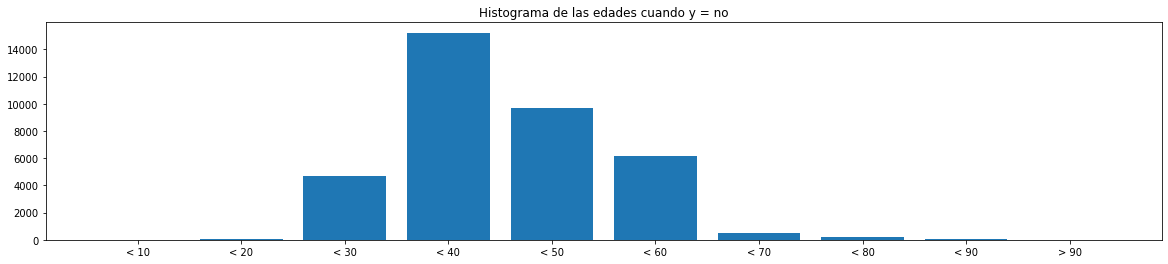

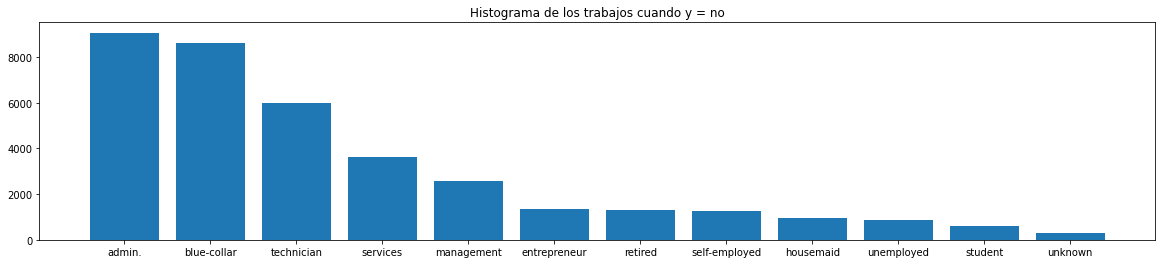

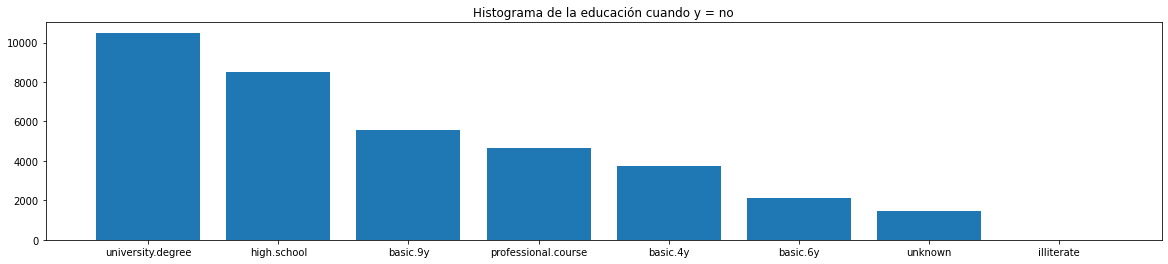

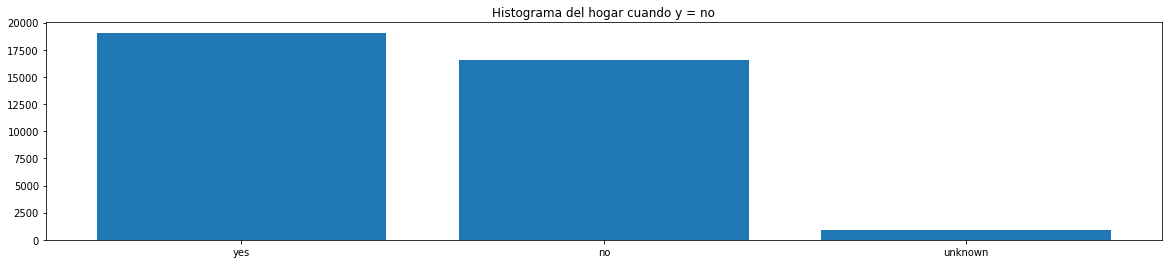

In [ ]:
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

yes_collect = simpleDF_yes.collect()
no_collect = simpleDF_nocon.collect()

counts_yes = [0,0,0,0,0,0,0,0,0,0]
counts_no = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(yes_collect)):
  if yes_collect[i][0] < 10:
    counts_yes[0] += 1
  elif yes_collect[i][0] < 20:
    counts_yes[1] += 1
  elif yes_collect[i][0] < 30:
    counts_yes[2] += 1
  elif yes_collect[i][0] < 40:
    counts_yes[3] += 1
  elif yes_collect[i][0] < 50:
    counts_yes[4] += 1
  elif yes_collect[i][0] < 60:
    counts_yes[5] += 1
  elif yes_collect[i][0] < 70:
    counts_yes[6] += 1
  elif yes_collect[i][0] < 80:
    counts_yes[7] += 1
  elif yes_collect[i][0] < 90:
    counts_yes[8] +=1
  else:
    counts_yes[9] +=1

for i in range(len(no_collect)):
  if no_collect[i][0] < 10:
    counts_no[0] += 1
  elif no_collect[i][0] < 20:
    counts_no[1] += 1
  elif no_collect[i][0] < 30:
    counts_no[2] += 1
  elif no_collect[i][0] < 40:
    counts_no[3] += 1
  elif no_collect[i][0] < 50:
    counts_no[4] += 1
  elif no_collect[i][0] < 60:
    counts_no[5] += 1
  elif no_collect[i][0] < 70:
    counts_no[6] += 1
  elif no_collect[i][0] < 80:
    counts_no[7] += 1
  elif no_collect[i][0] < 90:
    counts_no[8] +=1
  else:
    counts_no[9] +=1

q1 = simpleDF_yes.groupBy('job').agg(func.count('job').alias('count')).orderBy(func.col('count').desc(),func.col('job')).rdd.collect()
q2 = simpleDF_yes.groupBy('education').agg(func.count('education').alias('count')).orderBy(func.col('count').desc(),func.col('education')).rdd.collect()
q3 = simpleDF_yes.groupBy('housing').agg(func.count('housing').alias('count')).orderBy(func.col('count').desc(),func.col('housing')).rdd.collect()

q4 = simpleDF_nocon.groupBy('job').agg(func.count('job').alias('count')).orderBy(func.col('count').desc(),func.col('job')).rdd.collect()
q5 = simpleDF_nocon.groupBy('education').agg(func.count('education').alias('count')).orderBy(func.col('count').desc(),func.col('education')).rdd.collect()
q6 = simpleDF_nocon.groupBy('housing').agg(func.count('housing').alias('count')).orderBy(func.col('count').desc(),func.col('housing')).rdd.collect()


def histograma_plot(RDD):
  labels = [d[0] for d in RDD]
  values = [d[1] for d in RDD]
  plt.figure(figsize=(20,4))
  plt.bar(range(len(RDD)), values, tick_label=labels)
  plt.show()

def histograma_plot2(lista1):
  labels = ['< 10', '< 20', '< 30', '< 40', '< 50', '< 60', '< 70', '< 80', '< 90', '> 90']
  values = lista1
  plt.figure(figsize=(20,4))
  plt.bar(range(len(lista1)), values, tick_label=labels)
  plt.show()


labels = ['< 10', '< 20', '< 30', '< 40', '< 50', '< 60', '< 70', '< 80', '< 90', '> 90']
values = counts_yes
plt.figure(figsize=(20,4))
plt.title('Histograma de las edades cuando y = yes')
plt.bar(range(len(counts_yes)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q1]
values = [d[1] for d in q1]
plt.figure(figsize=(20,4))
plt.title('Histograma de los trabajos cuando y = yes')
plt.bar(range(len(q1)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q2]
values = [d[1] for d in q2]
plt.figure(figsize=(20,4))
plt.title('Histograma de la educación cuando y = yes')
plt.bar(range(len(q2)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q3]
values = [d[1] for d in q3]
plt.figure(figsize=(20,4))
plt.title('Histograma del hogar cuando y = yes')
plt.bar(range(len(q3)), values, tick_label=labels)
plt.show()


labels = ['< 10', '< 20', '< 30', '< 40', '< 50', '< 60', '< 70', '< 80', '< 90', '> 90']
values = counts_no
plt.figure(figsize=(20,4))
plt.title('Histograma de las edades cuando y = no')
plt.bar(range(len(counts_no)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q4]
values = [d[1] for d in q4]
plt.figure(figsize=(20,4))
plt.title('Histograma de los trabajos cuando y = no')
plt.bar(range(len(q4)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q5]
values = [d[1] for d in q5]
plt.figure(figsize=(20,4))
plt.title('Histograma de la educación cuando y = no')
plt.bar(range(len(q5)), values, tick_label=labels)
plt.show()

labels = [d[0] for d in q6]
values = [d[1] for d in q6]
plt.figure(figsize=(20,4))
plt.title('Histograma del hogar cuando y = no')
plt.bar(range(len(q6)), values, tick_label=labels)
plt.show()



In [ ]:
simpleDF_yes.createOrReplaceTempView('countsDF')
countsDF = spark.sql("SELECT job,education,count(*) AS conteo FROM countsDF GROUP BY 1,2 order by conteo DESC")
countsDF.show(20)


+-------------+-------------------+------+
|          job|          education|conteo|
+-------------+-------------------+------+
|       admin.|  university.degree|   823|
|       admin.|        high.school|   382|
|   technician|professional.course|   343|
|   management|  university.degree|   257|
|  blue-collar|           basic.9y|   240|
|   technician|  university.degree|   225|
|     services|        high.school|   203|
|      retired|           basic.4y|   185|
|  blue-collar|           basic.4y|   123|
|      student|        high.school|   114|
|  blue-collar|           basic.6y|   107|
|self-employed|  university.degree|    96|
|  blue-collar|        high.school|    94|
|   technician|        high.school|    85|
| entrepreneur|  university.degree|    66|
|      retired|  university.degree|    66|
|      retired|        high.school|    62|
|      student|            unknown|    59|
|      retired|professional.course|    57|
|    housemaid|           basic.4y|    51|
+----------

In [ ]:
simpleDF_yes.coalesce(1).write.format('json').save('file:///content/simpleDF_yes')
simpleDF_nocon.coalesce(1).write.format('json').save('file:///content/simpleDF_no')
countsDF.coalesce(1).write.format('json').save('file:///content/countsDF')
!hdfs dfs -mkdir Celda7
!hdfs dfs -put simpleDF_yes Celda7
!hdfs dfs -put simpleDF_no Celda7
!hdfs dfs -put countsDF Celda7
!hdfs dfs -ls Celda7

mkdir: `Celda7': File exists
put: `Celda7/simpleDF_yes/_SUCCESS': File exists
put: `Celda7/simpleDF_yes/part-00000-29e0f2ee-c5c2-4d37-941d-e897f446e99d-c000.json': File exists
Found 4 items
drwxr-xr-x   - root supergroup          0 2020-10-24 18:06 Celda7/countsDF
drwxr-xr-x   - root supergroup          0 2020-10-24 18:06 Celda7/simpleDF_no
drwxr-xr-x   - root supergroup          0 2020-10-24 17:42 Celda7/simpleDF_yes
drwxr-xr-x   - root supergroup          0 2020-10-24 17:13 Celda7/simpleDF_yes.json


In [309]:
banks = spark.sparkContext.textFile('file:///content/bank-additional-full.csv').map(lambda line: line.split(';')).filter(lambda line : line[20]=='"yes"').map(lambda line: [line[i] for i in [1,3]])
banks_count = banks.map(lambda x: ((x[0],x[1]), 1) ).reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1],ascending=False)
banks_count.take(20)

[(('"admin."', '"university.degree"'), 823),
 (('"admin."', '"high.school"'), 382),
 (('"technician"', '"professional.course"'), 343),
 (('"management"', '"university.degree"'), 257),
 (('"blue-collar"', '"basic.9y"'), 240),
 (('"technician"', '"university.degree"'), 225),
 (('"services"', '"high.school"'), 203),
 (('"retired"', '"basic.4y"'), 185),
 (('"blue-collar"', '"basic.4y"'), 123),
 (('"student"', '"high.school"'), 114),
 (('"blue-collar"', '"basic.6y"'), 107),
 (('"self-employed"', '"university.degree"'), 96),
 (('"blue-collar"', '"high.school"'), 94),
 (('"technician"', '"high.school"'), 85),
 (('"entrepreneur"', '"university.degree"'), 66),
 (('"retired"', '"university.degree"'), 66),
 (('"retired"', '"high.school"'), 62),
 (('"student"', '"unknown"'), 59),
 (('"retired"', '"professional.course"'), 57),
 (('"housemaid"', '"basic.4y"'), 51)]